In [14]:
%matplotlib inline
import eosWrap as eos
import numpy as np
from matplotlib import pyplot as plt
import Models2;
from scipy.interpolate import interp1d

In [2]:
wr = Models2.MKVOR_d()

In [3]:
m = wr.delta_phi

In [5]:
m.loadEos()

/home/const/workspace/swigEosWrapper/Wrapper2.py:1152: RuntimeWarning: invalid value encountered in true_divide
  self.xDUp = ((3*pi**2 * self.rho[:, 1])**(1./3) - (3*pi**2 * self.n_e)**(1./3))**(3.) / (3*pi**2 * self.nrange)


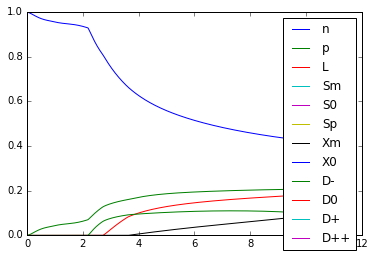

In [8]:
lines = plt.plot(m.nrange/m.n0, m.concentrations())
plt.legend(lines, m.part_names)

In [15]:
C = m.C
S,V = wr.dumpPotentials()
def proc(U):
    i = 8
    iS = interp1d(m.nrange/m.n0, S)
    iV = interp1d(m.nrange/m.n0, V)
    xs_d = (U - C.X_o[i]*iV(1.))/iS(1.)
    print(xs_d)

    xo=1.

    wr.setDeltaConst(np.array([xs_d for i in range(4)]),
                 np.array([xo for i in range(4)]),
                 np.array([1., 1., 1., 1.]),
                 's = %.2f o = %.2f U = %.0f' % (xs_d, xo, U))

In [24]:
proc(-30.)

0.862644802392


/home/const/workspace/swigEosWrapper/Wrapper2.py:1360: RuntimeWarning: invalid value encountered in true_divide
  self.xDUp = ((3*pi**2 * self.rho[:, 1])**(1./3) - (3*pi**2 * self.n_e)**(1./3))**(3.) / (3*pi**2 * self.nrange)


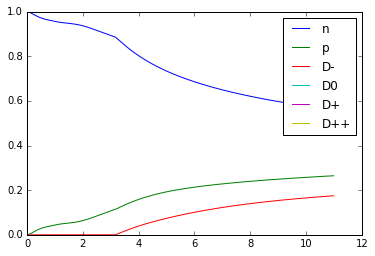

In [25]:
m = wr.delta_only
m.loadEos()
lines = plt.plot(m.nrange/m.n0, m.concentrations())
plt.legend(lines, m.part_names)

In [26]:
mod = eos.InterpolatedScalings()

(0, 8.0)

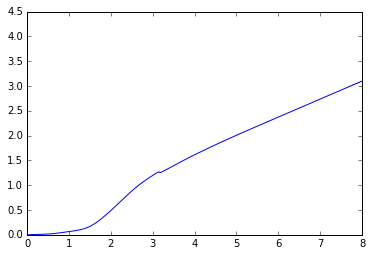

In [40]:
plt.plot(m.nrange/m.n0, np.gradient(m._P))
plt.xlim([0,8.])
#plt.ylim([0.,20])

In [41]:
wr.delta_onl.dumpMassesCrust()

_MKVOR_d
(936, 6) (69, 6)


LinAlgError: singular matrix